# Linear Regression



---



In [31]:
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [32]:
data = pd.read_csv("forestfires.csv", sep=",")
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [33]:
data = data[["temp", "rain", "rain", "area"]]
print(data.head())

   temp  rain  rain  area
0   8.2   0.0   0.0   0.0
1  18.0   0.0   0.0   0.0
2  14.6   0.0   0.0   0.0
3   8.3   0.2   0.2   0.0
4  11.4   0.0   0.0   0.0


In [34]:
predict = "area"
x= np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [35]:
x_train, x_test,  y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [36]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test ,y_test)
print(acc)

-0.017423349571170643


In [37]:
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear ,f)
pickle_in = open("studentmodel.pickle" , "rb")
linear = pickle.load(pickle_in)

In [38]:
print('coefficient: \n' , linear.coef_)
print('Intercept: \n', linear.intercept_)

coefficient: 
 [ 0.34549482 -0.47234378 -0.47234378]
Intercept: 
 2.1796180424160516


In [39]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

10.22964732210199 [23.3  0.   0. ] 6.36
10.920636959843272 [25.3  0.   0. ] 0.0
9.124063901715939 [20.1  0.   0. ] 58.3
6.9474465428309 [13.8  0.   0. ] 11.06
10.367845249650248 [23.7  0.   0. ] 1.12
10.091449394553734 [22.9  0.   0. ] 15.45
9.504108202473644 [21.2  0.   0. ] 11.16
12.095319344003453 [28.7  0.   0. ] 0.0
5.980061049993104 [11.  0.  0.] 27.35
9.573207166247773 [21.4  0.   0. ] 0.68
8.709470119071169 [18.9  0.   0. ] 10.34
8.953485772040741 [20.7  0.4  0.4] 0.0
7.949381517555759 [16.7  0.   0. ] 0.0
8.46762374586172 [18.2  0.   0. ] 0.0
8.813118564732362 [19.2  0.   0. ] 0.0
12.613561572309415 [30.2  0.   0. ] 0.0
10.056899912666669 [22.8  0.   0. ] 1.63
9.365910274925387 [20.8  0.   0. ] 0.0
8.674920637184105 [18.8  0.   0. ] 212.88
9.227712347377132 [20.4  0.   0. ] 0.0
7.776634108120438 [16.2  0.   0. ] 9.96
8.847668046619425 [19.3  0.   0. ] 1.56
6.6019517239602585 [12.8  0.   0. ] 1.64
7.4311392892497965 [15.2  0.   0. ] 31.86
10.920636959843272 [25.3  0.   0. ] 0.0



---



## Data Plot

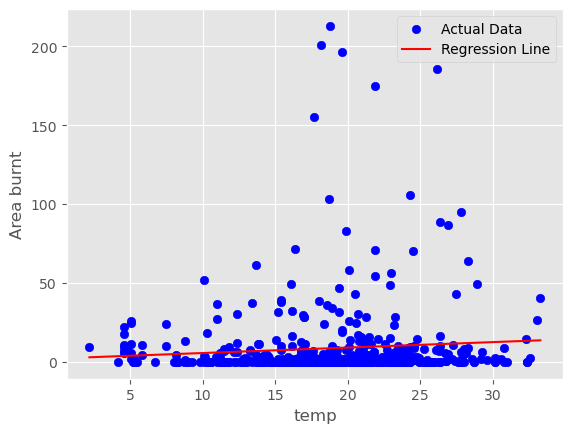

In [40]:
# Plot the data
style.use("ggplot")
p = "temp"
pyplot.scatter(data[p], data["area"], color='blue', label='Actual Data')

# Plot regression line (only for temp as an example)
slope = linear.coef_[0]  # Coefficient for temp
intercept = linear.intercept_

# Use the min and max values of temp to create a regression line
x_range = np.linspace(data[p].min(), data[p].max(), 100)
y_range = slope * x_range + intercept
pyplot.plot(x_range, y_range, color='red', label='Regression Line')

pyplot.xlabel(p)
pyplot.ylabel("Area burnt")
pyplot.legend()
pyplot.show()
